In [1]:
#########################################
##  Import libraries and functions
#########################################
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import linecache
# import sys

#Usage: generate_component_table(input_file)
from swe_processing import generate_component_table

#Usage: generate_impi_table(fin)
from swe_processing import generate_impi_table

#Usage: cpuhours = compute_cpuhours(walltime, numranks)
from swe_processing import compute_cpuhours

#Usage: (simtime, walltime, numcells, numranks) = getdata_sim(fin)
from swe_processing import getdata_sim

#Usage: (nranks, T_timestep) = getdata_tstep(filename, maxranks, rankspernode)
from swe_processing import getdata_tstep

#Usage: (fig, ax) = create_figure()
from swe_processing import create_figure

#Usage: plot_1d(xvec, yvec, xrange, yrange, xtitle, ytitle, outfig, printdots=False)
from swe_processing import plot_1d

#Usage: plot_1d_2scales(xvec, yvec1, yvec2, xrange, yrange1, yrange2, xtitle, ytitle1, ytitle2, outfig)
from swe_processing import plot_1d_2scales



In [2]:
###################################
##### PROVIDE INPUTS HERE !!! #####
###################################
# Valid runs
fin1 = "/media/data/emily/Downloads/testswe/swe.out"
wallhrs1 = 2

fin = fin1
wallhrs = wallhrs1

# Specify the output figure path & name
fout = '.'


In [3]:
generate_impi_table(fin)


Function               Avg. time (sec)    Acc. time (sec)    Percent (%)
----------------       ----------------   ----------------   -----------
Total adaptation              11.6652          23.3304         100.00
MPI_init_adapt                 0.2160           0.2160           0.93
MPI_Comm_probe_adapt           0.0008           0.0900           0.39
MPI_Comm_adapt_begin           9.8763          19.7526          84.66
MPI_Comm_adapt_commit          1.6338           3.2676          14.01
Data migration                 0.0021           0.0043           0.02



In [4]:
generate_component_table(fin)


Component              Exec. time (sec)     Percent (%)
----------------       ----------------     -----------
Total simulation              1373.3493     100.00
Computation                    343.4728      25.01
Grid refinement                259.1817      18.87
Conformity check               278.7037      20.29
Load balancing                 372.4562      27.12
Resource adaptation             23.3304       1.70
Others                          82.7527       6.03



In [5]:
(simtime, walltime, numcells, numranks) = getdata_sim(fin)

cpuhrs = compute_cpuhours(walltime, numranks)
print(cpuhrs)

111.10820000000001


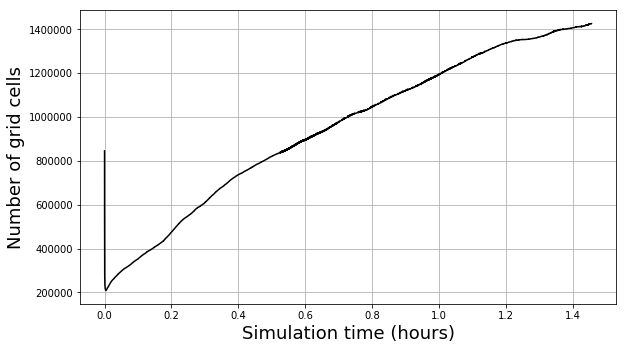

In [6]:
#####
# plot "Cells vs Sim.time (hours):
#####
xvec = [x/3600 for x in simtime]
yvec = numcells
xrange = [0,0]  #use [0,0] to auto set xlim
yrange = [0,0]  #use [0,0] to auto set ylim
xtitle = "Simulation time (hours)"
ytitle = "Number of grid cells"
outfig = fout+"/cells_vs_simhrs.pdf"

plot_1d(xvec, yvec, xrange, yrange, xtitle, ytitle, outfig)
    

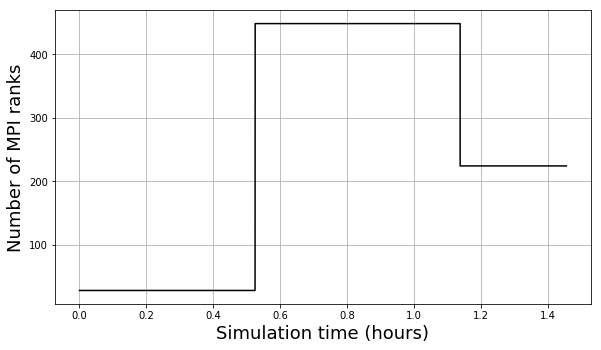

In [7]:
#####
# plot "Ranks vs Sim.time (hours):
#####
xvec = [x/3600 for x in simtime]
yvec = numranks
xrange = [0,0]  #use [0,0] to auto set xlim
yrange = [0,0]  #use [0,0] to auto set ylim
xtitle = "Simulation time (hours)"
ytitle = "Number of MPI ranks"
outfig = fout+"/ranks_vs_simhrs.pdf"

plot_1d(xvec, yvec, xrange, yrange, xtitle, ytitle, outfig)
    

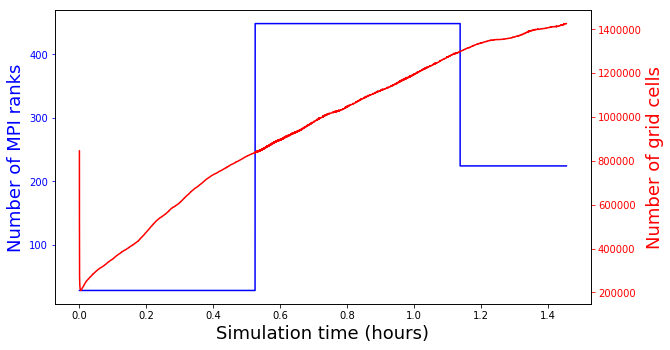

In [8]:
#####
# plot "Ranks|Cells vs Sim.time (hours):
#####
xvec = [x/3600 for x in simtime]
yvec1 = numranks
yvec2 = numcells
xrange = [0,0]  #use [0,0] to auto set xlim
yrange1 = [0,0]  #use [0,0] to auto set ylim
yrange2 = [0,0]  #use [0,0] to auto set ylim
xtitle = "Simulation time (hours)"
ytitle1 = "Number of MPI ranks"
ytitle2 = "Number of grid cells"
outfig = fout+"/ranks_cells_vs_simhrs.pdf"

plot_1d_2scales(xvec, yvec1, yvec2, xrange, yrange1, yrange2, xtitle, ytitle1, ytitle2, outfig)

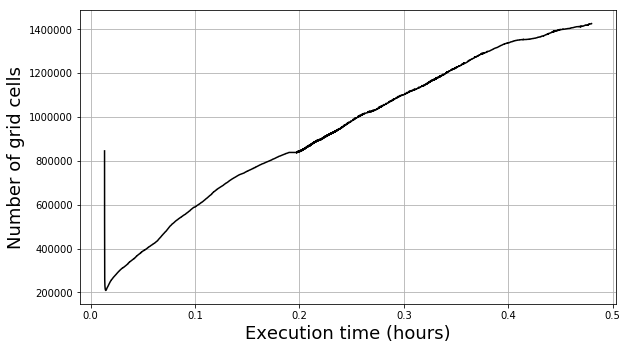

In [9]:
#####
# plot "Cells vs Exec.time (hrs):
#####
xvec = [x/3600 for x in walltime]
yvec = numcells
xrange = [0,0]  #use [0,0] to auto set xlim
yrange = [0,0]  #use [0,0] to auto set ylim
xtitle = "Execution time (hours)"
ytitle = "Number of grid cells"
outfig = fout+"/cells_vs_wallhrs.pdf"

plot_1d(xvec, yvec, xrange, yrange, xtitle, ytitle, outfig)
    

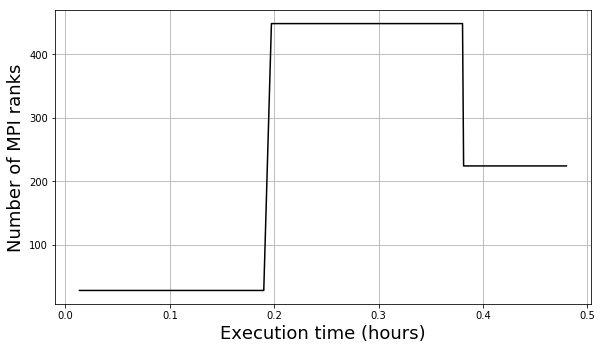

In [10]:
#####
# plot "Ranks vs Exec.time (hrs):
#####
xvec = [x/3600 for x in walltime]
yvec = numranks
xrange = [0,0]  #use [0,0] to auto set xlim
yrange = [0,0]  #use [0,0] to auto set ylim
xtitle = "Execution time (hours)"
ytitle = "Number of MPI ranks"
outfig = fout+"/ranks_vs_wallhrs.pdf"

plot_1d(xvec, yvec, xrange, yrange, xtitle, ytitle, outfig)
    

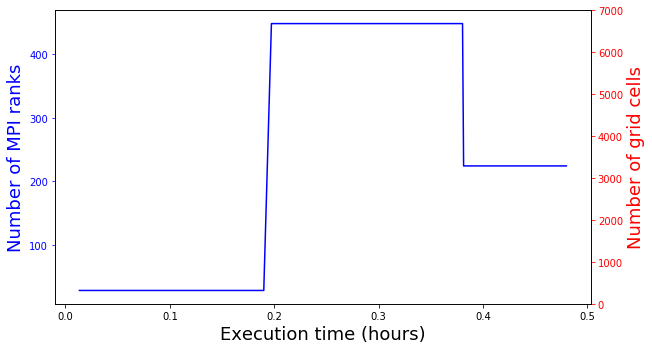

In [11]:
#####
# plot "Ranks|Cells vs Exec.time (hrs):
#####
xvec = [x/3600 for x in walltime]
yvec1 = numranks
yvec2 = numcells
xrange = [0,0]  #use [0,0] to auto set xlim
yrange1 = [0,0]  #use [0,0] to auto set ylim
yrange2 = [0,7000]  #use [0,0] to auto set ylim
xtitle = "Execution time (hours)"
ytitle1 = "Number of MPI ranks"
ytitle2 = "Number of grid cells"
outfig = fout+"/ranks_cells_vs_wallhrs.pdf"

plot_1d_2scales(xvec, yvec1, yvec2, xrange, yrange1, yrange2, xtitle, ytitle1, ytitle2, outfig)

[28, 224, 448]
[0.1427210729711226, 0.136414201183429, 0.1346936170212739]


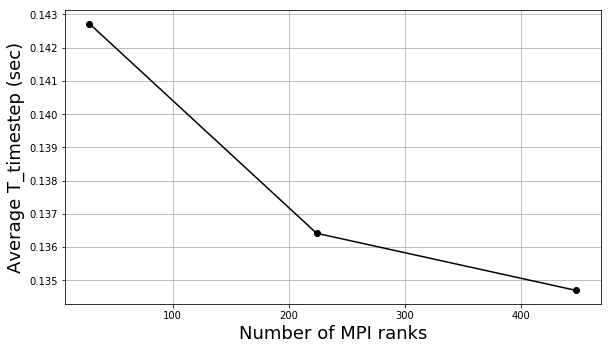

In [12]:
totalnodes = 20
rankspernode = 28
maxranks = totalnodes * rankspernode

(ranks, tavg) = getdata_tstep(fin, maxranks, rankspernode)

print(ranks)
print(tavg)

# Plot data
xvec = ranks
yvec = tavg
xrange = [0,0]  #use [0,0] to auto set xlim
yrange = [0,0]  #use [0,0] to auto set ylim
xtitle = "Number of MPI ranks"
ytitle = "Average T_timestep (sec)"
outfig = fout+"/Ttimestep_vs_ranks.pdf"

plot_1d(xvec, yvec, xrange, yrange, xtitle, ytitle, outfig, True)
    


In [ ]:
(simtime1, walltime1, numcells1, numranks1) = getdata_sim(fin1)
(simtime2, walltime2, numcells2, numranks2) = getdata_sim(fin2)
(simtime3, walltime3, numcells3, numranks3) = getdata_sim(fin3)
(simtime4, walltime4, numcells4, numranks4) = getdata_sim(fin4)

In [ ]:
(fig,ax) = create_figure()

xvec = [x/3600 for x in walltime1]
yvec = numranks1
colorstr = 'r'
legendstr = 'Static MPI with 16 ranks'
ax.plot(xvec, yvec, colorstr, label=legendstr)
ax.fill_between(xvec,yvec, facecolor="none", hatch="/", edgecolor=colorstr, linewidth=0.0)
plt.vlines(xvec[-1], 0, yvec[-1], color=colorstr, linestyle='--')
plt.text(xvec[-1]+0.5, -0.8, 'T1', color=colorstr, fontsize=10, fontweight='bold')

# xvec = [x/3600 for x in walltime2]
# yvec = numranks2
# colorstr = 'k'
# legendstr = "iMPI with random iRM"
# ax.plot(xvec, yvec, colorstr, label=legendstr)

xvec = [x/3600 for x in walltime3]
yvec = numranks3
colorstr = 'g'
legendstr = "Elastic MPI with stepping scheduler"
ax.plot(xvec, yvec, colorstr, label=legendstr)
ax.fill_between(xvec,yvec, facecolor="none", hatch="x", edgecolor=colorstr, linewidth=0.0)
plt.vlines(xvec[-1], 0, yvec[-1], color=colorstr, linestyle='--')
plt.text(xvec[-1], -0.8, 'T2', color=colorstr, fontsize=10, fontweight='bold')

xvec = [x/3600 for x in walltime4]
yvec = numranks4
colorstr = 'b'
legendstr = "Elastic MPI with 2 ranks unchanged"
ax.plot(xvec, yvec, colorstr, label=legendstr)
ax.fill_between(xvec,yvec, facecolor="none", hatch="*", edgecolor=colorstr, linewidth=0.0)
plt.vlines(xvec[-1], 0, yvec[-1], color=colorstr, linestyle='--')
plt.text(xvec[-1], -0.8, 'T3', color=colorstr, fontsize=10, fontweight='bold')

ax.legend(loc='upper right', framealpha=0.5, fontsize=14)
ax.grid(True)
ax.set_xlim(0,40)
ax.set_ylim(0,17)
ax.set_xlabel("Execution time (hours)", fontsize=18)
ax.set_ylabel("Number of MPI ranks", fontsize=18)

plt.savefig(fout+"/impi_vs_mpi_runs.pdf", bbox_inches="tight")
plt.show()   
plt.close(fig)

In [ ]:
##################################
#  Compare quality between runs
##################################

labels = ('0', 'Total simulation', 'Time step computation', 'Grid refinement', 'Grid conformity check', 
         'Load balancing', 'Resource adaptation', 'Others')

run1data = [100.00, 43.04, 10.07, 13.35, 22.80, 0.00, 10.74]
run2data = [100.00, 55.36, 13.88, 11.42, 13.33, 0.04,  5.98]
run3data = [100.00, 44.04, 11.38, 13.43, 21.28, 0.01,  9.86]
run4data = [100.00, 77.36, 16.44,  2.82,  0.68, 0.01,  2.70]

(fig,ax) = create_figure()

ind = np.arange(7) # the x locations for the groups
width = 0.25       # the width of the bars
p1 = ax.barh(ind+width*2, run1data, width, color='salmon', label='Static MPI with 16 ranks')
p2 = ax.barh(ind+width*1, run3data, width, color='palegreen', label="Elastic MPI with stepping scheduler")
p3 = ax.barh(ind+width*0, run4data, width, color='skyblue', label="Elastic MPI with 2 ranks unchanged")

ax.set_yticklabels(labels, fontsize=18)
ax.set_xlabel('% of total exec. time', fontsize=18)
ax.legend(loc='upper right', framealpha=0.5, fontsize=14)

plt.savefig(fout+"/compare_run_quality.pdf", bbox_inches="tight")
plt.show()   
plt.close(fig)